<a href="https://colab.research.google.com/github/Mahsa-Goudarzi/ComputerVision/blob/main/Test/CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

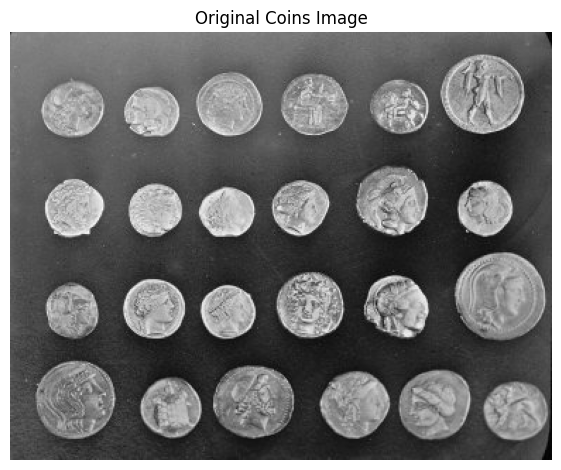

M = 303 columns, N = 384 rows
Pixel grayscale range: [1, 252]


In [ ]:
import matplotlib.pyplot as plt
from skimage.data import coins
import numpy as np

# Load image
image = coins()
# 'coins' is already grayscale, so we dont need to convert it to grayscale

# Plot original image
plt.imshow(image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')
plt.tight_layout()
plt.show()

print('M = {} columns, N = {} rows'.format(*image.shape)) # Print out image size

# Report pixel value range
pixel_min = image.min()
pixel_max = image.max()
print("Pixel grayscale range: [{}, {}]".format(pixel_min, pixel_max))

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

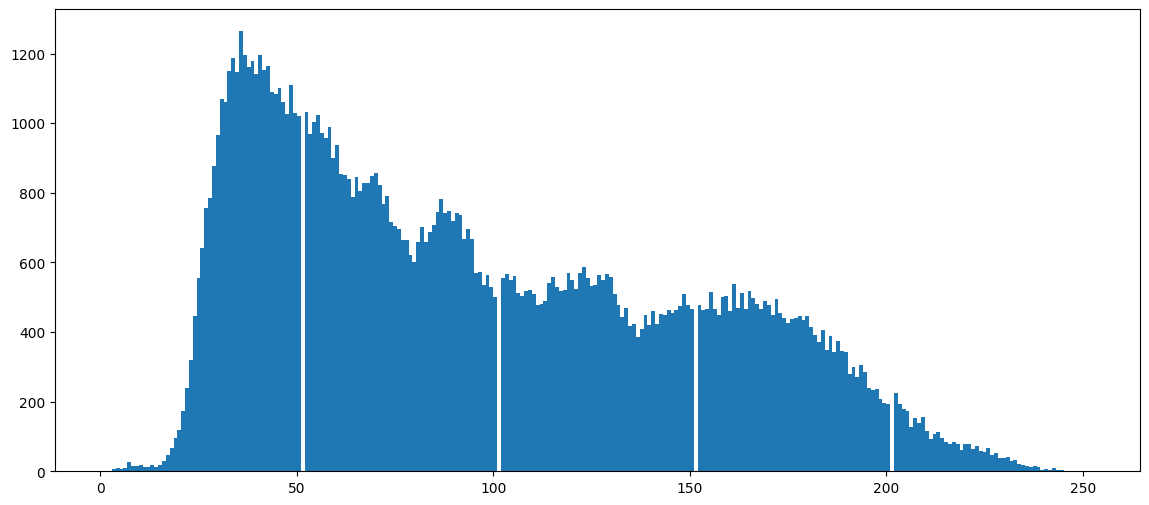

In [ ]:
# reshape the uint8 image as 1d array:
v = image.reshape(image.shape[0]*image.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

# The histogram shows two main peaks, corresponding to the dark background and the bright coin surfaces.
# Left peak (low intensity) Represents dark regions in the image such as background shadows and the space between the coins
# Right peak (high intensity) corresponds to bright regions like the faces of the coins (they reflect more light) and any illuminated or metallic surface portions

## 3. Applied noise to the image and use the correct function to erase the noise.

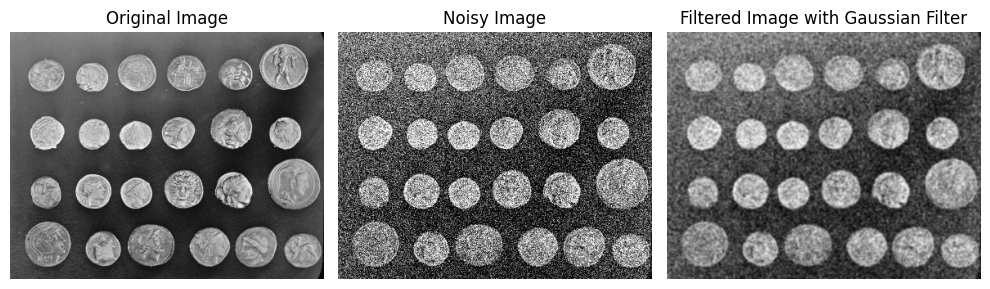

In [ ]:
from skimage.util import random_noise
from skimage.filters import gaussian

noisy_image = random_noise(image, mode='gaussian', var=0.05)
filtered_image = gaussian(noisy_image, sigma=1)

fig, axes = plt.subplots(1,3, figsize=(10,8))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(filtered_image, cmap='gray')
axes[2].set_title("Filtered Image with Gaussian Filter")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# The Gaussian Filter works well with redusing the noice but it smoothes the edges and makes the image blurry

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

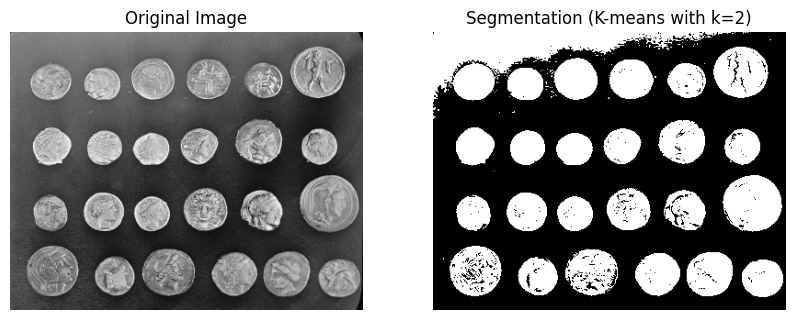

In [ ]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# Fit a Kmeans clustering model with two clusters using training image:
v_I = np.reshape(image,(image.shape[0]*image.shape[1],1)) # reshape image as NPIX x NCHANNELS array
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans,(image.shape[0],image.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()
plt.show()

# It works relatively fine with making the coins stand out. But it has some mistakes as it considers the illuminated part at the top left as part of coins.

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

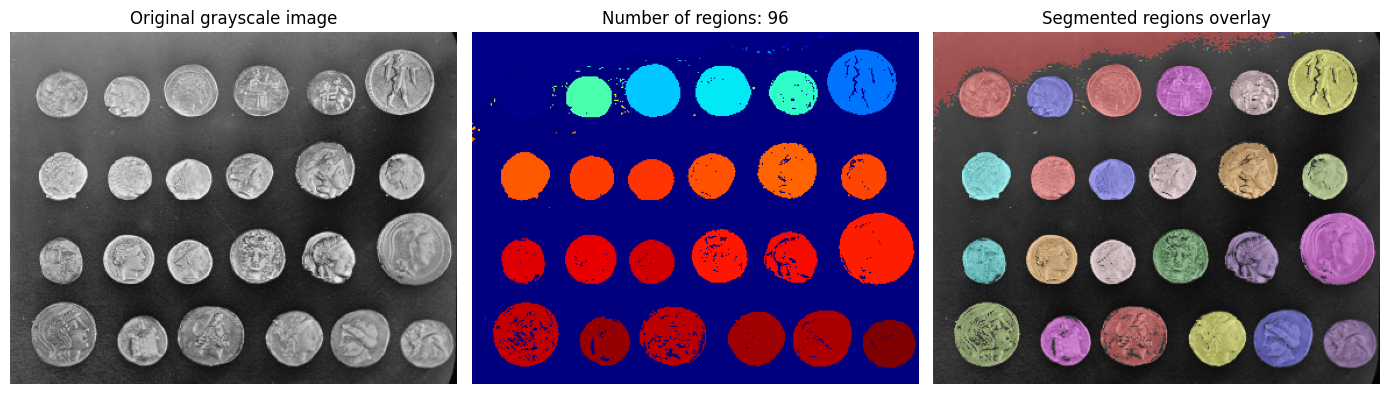

In [ ]:
from skimage.measure import label
from skimage.color import label2rgb

# label image regions:
label_image, nregions = label(I_kmeans,return_num=True)
image_label_overlay = label2rgb(label_image, image=image)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(image,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions))
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

In [ ]:
from skimage.measure import regionprops
import pandas as pd
from skimage import measure

properties = measure.regionprops_table(label_image,properties=['label','area','axis_major_length','orientation'])

df_features = pd.DataFrame(properties)
df_features.head()

,label,area,axis_major_length,orientation
0,1,8792.0,292.106573,-1.423583
1,2,37.0,14.020584,1.524098
2,3,21.0,16.645960,-1.508404
3,4,1.0,0.000000,-0.785398
4,5,2.0,2.000000,0.000000


In [ ]:
print("Average value of area is: ", df_features['area'].mean())
print("Average value of axis_major_length is: ", df_features['axis_major_length'].mean())
print("Average value of orientation is: ", df_features['orientation'].mean())

Average value of area is:  469.96875
Average value of axis_major_length is:  15.758363582402723
Average value of orientation is:  -0.1608039190057604


<Axes: xlabel='axis_major_length', ylabel='area'>

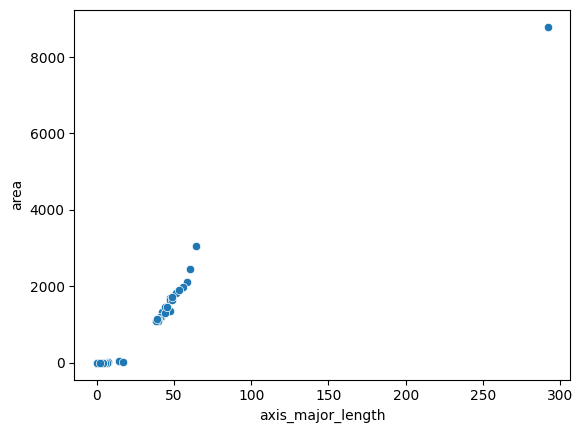

In [ ]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [ ]:
df_features.loc[df_features['area']>=1750]

,label,area,axis_major_length,orientation
0,1,8792.0,292.106573,-1.423583
22,23,2459.0,59.966495,1.552547
76,77,1836.0,51.388453,1.532671
83,84,3062.0,64.327036,1.375045
89,90,2111.0,58.136960,-1.105450
90,91,1971.0,56.055225,-1.478277
91,92,1918.0,52.847912,-0.985728


In [ ]:
df_large_coins = df_features.loc[df_features['area']>=1750]
N_large = df_large_coins.shape[0]
print('there are {} coins with an area larger than or equal 1750'.format(N_large))

there are 7 coins with an area larger than or equal 1750


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

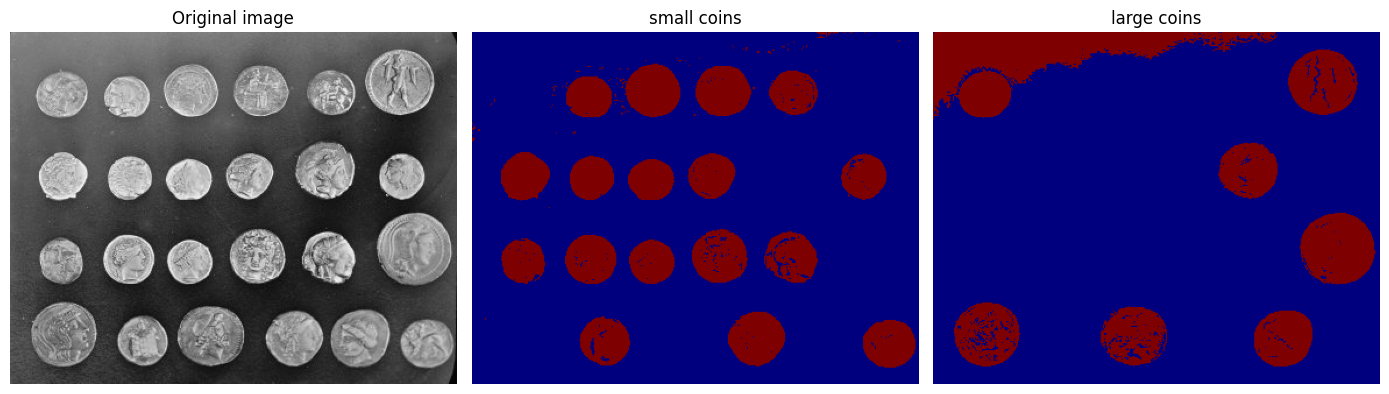

In [ ]:
df_small_coins = df_features.loc[df_features['area']<1750]

labels_small = df_small_coins['label'].values
labels_large = df_large_coins['label'].values

# Create binary masks (same shape as label_image)
mask_small_coins = np.isin(label_image,labels_small)
mask_large_coins = np.isin(label_image,labels_large)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(image,cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(mask_small_coins,cmap=plt.cm.jet)
ax[1].set_title('small coins') # set figure title
ax[2].imshow(mask_large_coins,cmap=plt.cm.jet)
ax[2].set_title('large coins')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

### RGB/Grayscale Image Segmentation Using Gaussian Mixture Model (GMM)

#### Steps

1. **Load the image**

2. **Preprocess the image**
   - Normalize pixel values to `[0, 1]` (optional but recommended).
   - For grayscale: Reshape to `(-1, 1)`
   - For RGB: Reshape to `(-1, 3)`

3. **Fit the GMM model**
   - Use `sklearn.mixture.GaussianMixture`
   - Choose the number of components `n_components` based on the number of regions to segment.

4. **Predict the cluster labels**
   - Use `model.predict()` to get the label for each pixel.

5. **Reshape the labels to the original image shape**
   - Reshape back to `(H, W)` for grayscale or color image dimensions.

6. **Visualize the segmented result**


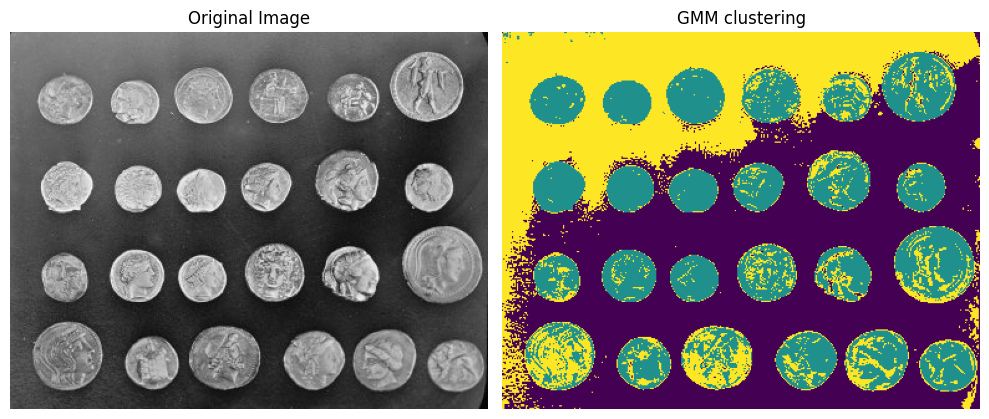

In [ ]:
# Gaussian Mixture Models (GMM)

from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm = np.reshape(v_gmm,(image.shape[0],image.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(image, cmap='gray')
ax0.set_title('Original Image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

# Using GMM Clustring with number of components being 3, the coins are differentiated more accurately from the background

## 10. Extract the main texture features of this image

In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

# Compute GLCM (distance=1, angle=0)
glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

# Extract texture features
contrast = graycoprops(glcm, 'contrast')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]

# Print results
print(f"Texture Features of the 'coins' image:")
print(f"  Contrast    : {contrast:.4f}")
print(f"  Correlation : {correlation:.4f}")
print(f"  Energy      : {energy:.4f}")
print(f"  Homogeneity : {homogeneity:.4f}")


Texture Features of the 'coins' image:
  Contrast    : 351.8455
  Correlation : 0.9372
  Energy      : 0.0196
  Homogeneity : 0.2382


In [ ]:
props = regionprops(label_image,intensity_image=image)

nregions = len(props)

iregion = 0
props_texture = np.zeros((nregions,5))
for p in props:
    minr, minc, maxr, maxc = p.bbox
    I = image[minc:maxc,minr:maxr]
    g = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(g, 'contrast')
    dissimilarity = graycoprops(g, 'dissimilarity')
    homogeneity = graycoprops(g, 'homogeneity')
    energy = graycoprops(g, 'energy')
    correlation = graycoprops(g, 'correlation')

    props_texture[iregion,0] = contrast
    props_texture[iregion,1] = dissimilarity
    props_texture[iregion,2] = homogeneity
    props_texture[iregion,3] = energy
    props_texture[iregion,4] = correlation

    iregion = iregion + 1

# Export to Excel file
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("Texture_features.xlsx", index=False)
df

<ipython-input-120-19ef7e596541>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,0] = contrast
<ipython-input-120-19ef7e596541>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,1] = dissimilarity
<ipython-input-120-19ef7e596541>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  props_texture[iregion,2] = homogeneity
<ipython-input-120-19ef7e596541>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scala

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,351.845453,9.292566,0.238239,0.019559,0.937166
1,351.845453,9.292566,0.238239,0.019559,0.937166
2,351.845453,9.292566,0.238239,0.019559,0.937166
3,351.845453,9.292566,0.238239,0.019559,0.937166
4,351.845453,9.292566,0.238239,0.019559,0.937166
...,...,...,...,...,...
91,351.845453,9.292566,0.238239,0.019559,0.937166
92,351.845453,9.292566,0.238239,0.019559,0.937166
93,351.845453,9.292566,0.238239,0.019559,0.937166
94,351.845453,9.292566,0.238239,0.019559,0.937166
